In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_digits


digits=load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


<AxesSubplot:ylabel='count'>

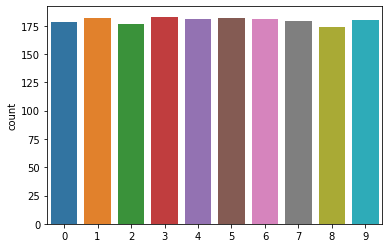

In [3]:
sns.countplot(digits.target)

### 타깃이 9:1 비율을 갖도록


In [4]:
y=digits.target==9

In [5]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

<AxesSubplot:ylabel='count'>

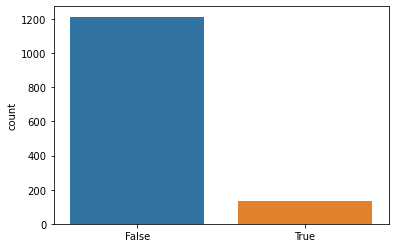

In [6]:
sns.countplot(y_train)

* 참고 교재에 나와있기 때문에 한번 해보는 DummyClassifier

In [7]:
from sklearn.dummy import DummyClassifier
# 모델 선택, 훈련
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
pred_most_frequent=dummy_majority.predict(X_test) # 예측
print('예측된 레이블의 고유값: {}'.format(np.unique(pred_most_frequent)))

# [].score : 분류의 경우 -> 정확도 || 회귀의 경우 -> 결정계수
print('테스트 점수 : {:.2f}'.format(dummy_majority.score(X_test,y_test)))

예측된 레이블의 고유값: [False]
테스트 점수 : 0.90


### 의사 결정 트리 (DecisionTree)

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree=tree.predict(X_test)
print('테스트 점수 : {:.2f}'.format(tree.score(X_test,y_test)))

테스트 점수 : 0.92


### LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg=LogisticRegression(C=0.1).fit(X_train,y_train)
pred_logreg=logreg.predict(X_test)
print('logreg 점수 : {:.2f}'.format(logreg.score(X_test,y_test)))

dummy 점수: 0.82
logreg 점수 : 0.98


In [11]:
import mglearn

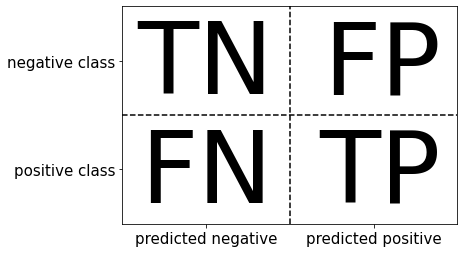

In [13]:
mglearn.plots.plot_binary_confusion_matrix()

In [15]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n{}".format(confusion))

오차 행렬:
[[402   1]
 [  6  41]]


In [16]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))

print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))

print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))

print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[363  40]
 [ 41   6]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[402   1]
 [  6  41]]


### 다양한 분류 측정 방법
* 이진 분류에서는 정밀도와 재현율을 가장 많이 사용
    * 분야마다 많이 사용하는 함수는 다를 수 있음.

### F-점수 (F-Score)
* 정밀도와 민감도(recall, 재현율)를 하나만 가지고 측정이 안되기에
정밀도와 재현율의 조화평균인 f-score은 이 둘을 하나로 요약해줌.
* 공식 : 2×(정밀도*재현율)÷(정밀도+재현율)

In [18]:
from sklearn.metrics import f1_score

In [19]:
# Dummy분류
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))

# 의사결정트리
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))

# 로지스틱 
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

무작위 더미 모델의 f1 score: 0.13
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


In [20]:
### f1-score 요약본
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=['not 9', 'is 9']))

              precision    recall  f1-score   support

       not 9       0.90      1.00      0.94       403
        is 9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



### 로지스틱 회귀

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg, target_names=['not 9', 'is 9']))

              precision    recall  f1-score   support

       not 9       0.99      1.00      0.99       403
        is 9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [22]:
from sklearn.svm import SVC

from mglearn.datasets import make_blobs 

In [23]:
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2],random_state=22)
                     
print(X.shape, y.shape)


(450, 2) (450,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train) 

In [25]:
# 0으로 분류
decision_0 = svc.decision_function(X_test)   > 0
decision_m08 = svc.decision_function(X_test) > -.8

# TP - 잘 맞추는 것을 늘린다.
print("양성을 양성으로 예측(TP) 개수 :", decision_0.sum() ) 
print("양성을 양성으로 예측(TP) 개수 :", decision_m08.sum() )  

# (FP-양성을 잘못 예측하는 것은 줄어듬) 즉 NP는 올라가고 정밀도가 낮아짐
print("양성을 음성예측의(FP) 개수 :", len(decision_0) - decision_0.sum() ) 
print("양성을 음성예측의(FP) 개수 :", len(decision_m08) - decision_m08.sum()  )

양성을 양성으로 예측(TP) 개수 : 17
양성을 양성으로 예측(TP) 개수 : 28
양성을 음성예측의(FP) 개수 : 96
양성을 음성예측의(FP) 개수 : 85


In [28]:
## 임계값을 0에서 -0.8로 했을때의 값.
y_pred_threshold = svc.decision_function(X_test) > 0
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

print(classification_report(y_test, y_pred_threshold))
print()
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113


              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113

